# Análise de Padrões de Compra e Recomendação de Produtos: Uma Abordagem com o Algoritmo Apriori


### Desenvolvido por: Fernanda Paula Rocha

---

## Introdução
Este projeto tem como objetivo explorar padrões de compra em um conjunto de dados que registra transações comerciais. A técnica empregada será o algoritmo Apriori, visando identificar associações frequentes entre produtos em diferentes transações. A aplicação do Apriori pode ser fundamental para compreender quais produtos são frequentemente adquiridos juntos, possibilitando a criação de um sistema de recomendação inteligente.

## Conjunto de Dados
O conjunto de dados utilizado é o **'Online Retail.xlsx'**, composto pelas seguintes variáveis:

1. **`InvoiceNo`:** Número de identificação da fatura. Se este código começar com a letra **'c'**, indica cancelamento.
2. **`StockCode`:** Código de estoque do produto.
3. **`Description`:** Descrição do produto.
4. **`Quantity`:** Quantidade do produto adquirido por transação (int64).
5. **`InvoiceDate`:** O dia e hora em que cada transação foi gerada (datetime64[ns]).
6. **`UnitPrice`:** Preço unitário do produto em libras esterlinas (float64).
7. **`CustomerID`:** Identificador único do cliente (float64).
8. **`Country`:** País onde cada cliente reside.

**Observação**: Este é um conjunto de dados transnacionais que contém todas as transações ocorridas entre 12/01/2010 e 12/09/2011 para um varejo on-line sem loja registrado e com sede no Reino Unido. Muitos clientes da empresa são atacadistas.

## Objetivo do Projeto
O objetivo principal deste projeto é aplicar o algoritmo Apriori para identificar padrões de associação entre produtos com base nas transações registradas. A análise buscará responder a perguntas como "Quais produtos são frequentemente comprados juntos?" e "Existem padrões sazonais ou de comportamento de compra?". A partir desses insights, será possível desenvolver um sistema de recomendação que ofereça sugestões personalizadas com base no histórico de transações dos clientes.

Ao compreender as associações entre produtos, o sistema de recomendação terá o potencial de otimizar as estratégias de vendas, proporcionando uma experiência de compra mais personalizada e aumentando a satisfação do cliente.

Vamos explorar o conjunto de dados e aplicar o algoritmo Apriori para desvendar padrões significativos de compra.


# ------------------------------------------------------------------
# Carregamento e Exploração Inicial dos Dados
# ------------------------------------------------------------------

In [1]:
# --------------------------------------------------------------
# Importação de Bibliotecas
# --------------------------------------------------------------

import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy
import statsmodels.api as sm

from scipy import stats
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")

# Versões das bibliotecas utilizadas:
# Pandas: 1.4.2
# NumPy: 1.22.3
# Matplotlib: 3.4.3
# Seaborn: 0.12.1
# Scipy: 1.7.3
# Sklearn: 1.1.3
# Mlxtend: 0.19.0

In [6]:
print("Versões das bibliotecas utilizadas:")
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Scipy:", scipy.__version__)
print("Sklearn:", sklearn.__version__)
print("Mlxtend:", mlxtend.__version__)


Versões das bibliotecas utilizadas:
Pandas: 1.4.2
NumPy: 1.22.3
Matplotlib: 3.4.3
Seaborn: 0.12.1
Scipy: 1.7.3
Sklearn: 1.1.3
Mlxtend: 0.19.0


In [3]:
data = pd.read_excel("data/Online Retail.xlsx")

print("Primeiras linhas do conjunto de dados:")
data.head()

Primeiras linhas do conjunto de dados:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df = data.copy()

In [7]:
print('Países que compraram na loja:\n','\n', df['Country'].unique())


Países que compraram na loja:
 
 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


### Análises Descritivas

Para explorar e compreender o conjunto de dados, foram realizadas diversas análises descritivas que fornecem insights importantes sobre o comportamento das transações. A seguir, apresentamos um resumo das análises:

1. **Valor Total de Compras por País e seu Top 10 Produtos Mais Comprados:**
   - Verificar o valor total das compras para cada país e identificamos os 10 produtos mais comprados, fornecendo uma visão abrangente das transações.

2. **Horário, Dia da Semana e Mês do Ano com Maior Volume de Compras:**
   - Analisar o horário e o dia da semana em que se realizam mais transações, destacando os momentos de pico de atividade de compra.

3. **Intervalo de Dias Entre Compras Mais Frequente:**
   - Calcular o número de dias decorridos entre a compra atual e a anterior para cada cliente, oferecendo insights sobre a frequência de compras de cada consumidor.

4. **Top 10 Produtos Mais Adquiridos na Loja:**
   - Destacar os 10 produtos mais adquiridos globalmente, proporcionando uma compreensão dos itens mais populares no conjunto de dados.

5. **Produtos Mais Adquiridos por Cliente:**
   - Identificar quais produtos foram mais adquiridos por cada cliente, revelando padrões individuais de preferências de compra.

6. **Análises de Estatísticas:**
   - Realizar análises estatísticas básicas para cada atributo do conjunto de dados, fornecendo uma visão detalhada das características e distribuições das variáveis.

Essas análises oferecem uma visão abrangente do comportamento das transações, proporcionando informações valiosas para orientar decisões e estratégias futuras.


#### 1. Total de compras de cada país e quais os 10 produtos mais comprados

In [8]:
df_total = df.groupby("Country")["UnitPrice"].sum()


df_total = df_total.sort_values(ascending=False)

print('Valor total de compras de cada país:')
print(df_total)

Valor total de compras de cada país:
Country
United Kingdom          2245715.474
EIRE                      48447.190
France                    43031.990
Germany                   37666.000
Singapore                 25108.890
Portugal                  13037.540
Spain                     12633.450
Hong Kong                 12241.500
Belgium                    7540.130
Switzerland                6813.690
Norway                     6529.060
Netherlands                6492.550
Australia                  4054.750
Cyprus                     3920.070
Italy                      3879.390
Finland                    3786.850
Channel Islands            3738.550
Sweden                     1806.830
Austria                    1701.520
Poland                     1422.270
Denmark                    1266.950
Unspecified                1204.010
Israel                     1079.040
Canada                      910.580
Japan                       814.860
Greece                      713.290
Malta              

In [9]:
# Verificando os produtos mais comprados por cada país
for country in df["Country"].unique():
    df_country = df[df["Country"] == country]
    df_product = df_country.groupby("Description")["Quantity"].sum().sort_values(ascending=False).reset_index()
    print(f"Top 10 Produtos do País: {country}")
    print(df_product.head(10))
    print('\n')


Top 10 Produtos do País: United Kingdom
                          Description  Quantity
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS     48326
1             JUMBO BAG RED RETROSPOT     43167
2                      POPCORN HOLDER     34365
3       ASSORTED COLOUR BIRD ORNAMENT     33679
4  WHITE HANGING HEART T-LIGHT HOLDER     33193
5          PACK OF 12 LONDON TISSUES      25307
6     PACK OF 72 RETROSPOT CAKE CASES     24702
7     VICTORIAN GLASS HANGING T-LIGHT     23242
8                 BROCADE RING PURSE      22801
9           ASSORTED COLOURS SILK FAN     20322


Top 10 Produtos do País: France
                        Description  Quantity
0                RABBIT NIGHT LIGHT      4023
1           MINI PAINT SET VINTAGE       2196
2     RED TOADSTOOL LED NIGHT LIGHT      1314
3       SET/6 RED SPOTTY PAPER CUPS      1272
4     ASSORTED COLOUR BIRD ORNAMENT      1204
5   PACK OF 72 RETROSPOT CAKE CASES      1176
6  PLASTERS IN TIN WOODLAND ANIMALS      1144
7    PLASTERS IN TIN CIRCUS PA

Top 10 Produtos do País: Austria
                           Description  Quantity
0     SET 12 KIDS COLOUR  CHALK STICKS       288
1                   MINI JIGSAW PURDEY       240
2       PACK OF 6 PANNETONE GIFT BOXES       144
3         PACK OF 6 SWEETIE GIFT BOXES       144
4           PARTY CONES CANDY ASSORTED        48
5   PACK OF 60 PINK PAISLEY CAKE CASES        48
6  12 PENCILS SMALL TUBE RED RETROSPOT        48
7                   KIDS RAIN MAC BLUE        48
8          TEA BAG PLATE RED RETROSPOT        48
9       PLASTERS IN TIN CIRCUS PARADE         48


Top 10 Produtos do País: Israel
                           Description  Quantity
0               WOODLAND CHARLOTTE BAG       130
1          RED RETROSPOT CHARLOTTE BAG       110
2      BLUE STRIPE CERAMIC DRAWER KNOB        96
3  ROUND SNACK BOXES SET OF4 WOODLAND         96
4             REGENCY TEA PLATE ROSES         72
5   ASS FLORAL PRINT MULTI SCREWDRIVER        72
6    SET OF 4 KNICK KNACK TINS DOILEY         60
7 

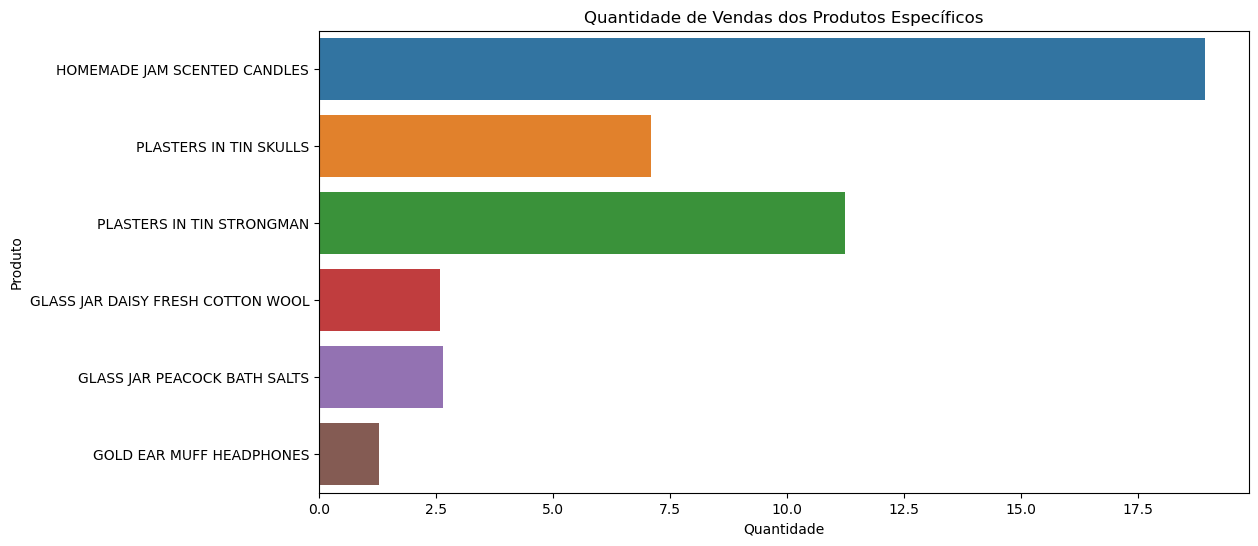

In [10]:
produtos = ['ASSORTED BOTTLE TOP  MAGNETS', 'HOMEMADE JAM SCENTED CANDLES',
            'PLASTERS IN TIN CIRCUS PARADE', 'PLASTERS IN TIN SKULLS', 'PLASTERS IN TIN STRONGMAN', 
            'GLASS JAR MARMALADE', 'GLASS JAR PEACOCK BATH SALTS', 'GOLD EAR MUFF HEADPHONES', 
            'GLASS JAR DAISY FRESH COTTON WOOL']

# Filtrando o DataFrame para incluir apenas os produtos mencionados
df_produtos = df[df['Description'].isin(produtos)]


plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=df_produtos, ci=None)
plt.title('Quantidade de Vendas dos Produtos Específicos')
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.show()



Com base nos resultados fornecidos para o valor total de compras de cada país, podemos fazer as seguintes observações:

 1. Receita Principal:
   - O **Reino Unido (United Kingdom)** tem uma receita significativamente maior em comparação com outros países, totalizando $2,245,715.47. Considerando que a loja possui sede no país, os produtos devem ser mais direcionados a este público. 
   - **EIRE** e **França** são os países seguintes com maiores receitas, mas estão significativamente atrás do Reino Unido.


 2. Diversidade de Clientes:
   - Países como **Singapura, Portugal, Espanha, Hong Kong** e **Bélgica** também contribuem para a receita, mostrando uma diversidade de clientes internacionais.


 3. Participação de Outros Países:
   - Alguns países têm uma participação menor na receita total, como **Arábia Saudita, Lituânia, República Tcheca, Bahrein**, entre outros.


 4. Potencial para Crescimento:
   - Países com receitas mais baixas, como **Brasil, Líbano** e **Emirados Árabes Unidos**, podem ser áreas de oportunidade para expandir os negócios.


 5. Importância dos 10 Principais Países:
   - Concentrar esforços nos **10 principais países** pode ser estratégico, pois esses países representam a maior parte da receita total.
   
 6. Produtos dos países menores:
   - Analisando os produtos do país com menor compra (**Saudi Arabia**), fica evidente que estes são consumidos por uma parte muito pequena dos países, indicando baixa demanda e consequentemente, menor quantidade de vendas. 

Essas observações são baseadas em uma análise rápida dos valores totais de compras por país. É importante considerar outros fatores, como custos operacionais, margens de lucro e potenciais de mercado ao tomar decisões estratégicas.


#### 2. Horário, dia da semana e mês do ano em que se realizam mais compras 

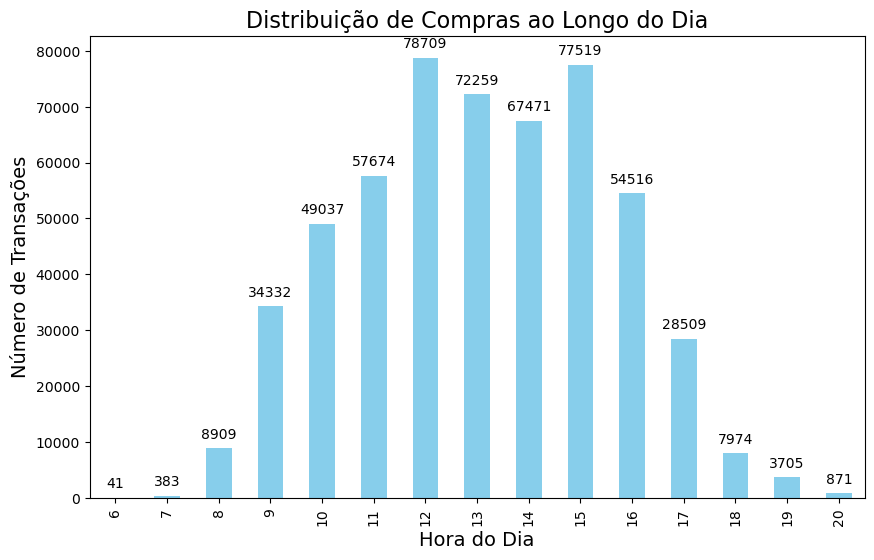

In [11]:
# Extraindo a hora do dia da coluna InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Criando um gráfico de barras para mostrar a distribuição das compras ao longo do dia
plt.figure(figsize=(10, 6))
ax = df['Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Distribuição de Compras ao Longo do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Transações', fontsize=14)
plt.show()


Verifica-se que a hora do dia em que são efetuadas mais compras são as 12 da manhã. E que o período em que são feitas mais compras é o período entre as 12 da manhã até as 15 horas. Isto significa que as compras são efetuadas maioritariamente dentro do horário laboral.

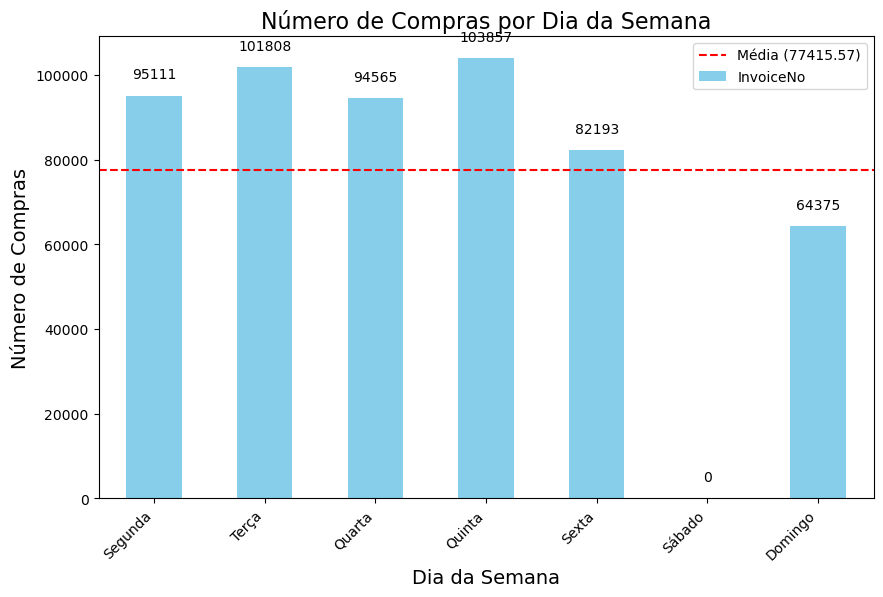

In [12]:
# Extraindo a informação do dia da coluna InvoiceDate
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Garantindo que todos os dias da semana estejam presentes, mesmo que não haja compras nesses dias
all_days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=all_days_of_week, ordered=True)

# Agrupando os dados por dia da semana e calculando a média do número de compras
average_purchase_by_day = df.groupby('DayOfWeek')['InvoiceNo'].count().mean()

# Mapeando os nomes dos dias para o português
day_names_pt = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}

# Criando um gráfico de barras para mostrar o número de compras por dia da semana
plt.figure(figsize=(10, 6))
purchase_count_by_day = df.groupby('DayOfWeek')['InvoiceNo'].count()
purchase_count_by_day.index = purchase_count_by_day.index.map(day_names_pt)
purchase_count_by_day.plot(kind='bar', color='skyblue')

for p in range(len(purchase_count_by_day)):
    plt.annotate(str(purchase_count_by_day.iloc[p]), (p, purchase_count_by_day.iloc[p]),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Adicionando uma linha horizontal para indicar a média
plt.axhline(y=average_purchase_by_day, color='red', linestyle='--', label=f'Média ({average_purchase_by_day:.2f})')


plt.title('Número de Compras por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Número de Compras', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Foi considerado importante analisar também o número de compras por dia da semana. No conjunto de dados não existe indicação de dias da semana, mas possui a variável `InvoiceDate` com a data e hora da transação da compra. O ``pandas`` oferece uma funcionalidade chamada ``dt.day_name()``, que, quando aplicada a uma coluna de data, retorna os nomes dos dias da semana correspondentes. 

Neste caso, a quinta-feira têm o maior número de compras, seguido de terça-feira. Há uma variação significativa a compras no domingo, ficando abaixo da média. No caso do domingo, pode ser útil direcionar esforços de marketing ou promoções.

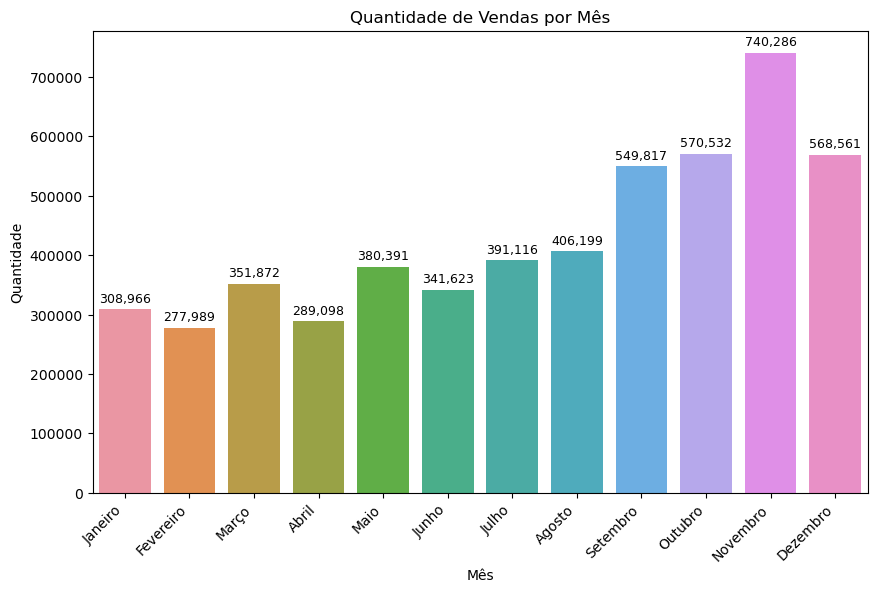

In [13]:
# Convertendo 'InvoiceDate' para o formato datetime se necessário
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Adicionando a coluna 'Month'
df['Month'] = df['InvoiceDate'].dt.month

# Agrupando por mês e somando as quantidades vendidas
vendas_por_mes = df.groupby('Month')['Quantity'].sum().reset_index()

meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
vendas_por_mes['Month'] = vendas_por_mes['Month'].map(meses)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Month', y='Quantity', data=vendas_por_mes)
plt.title('Quantidade de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.show()


O mês de novembro têm o maior número de compras, seguido de outubro e dezembro. Nota-se uma tendência maior de compras nos períodos próximos ao fim do ano. Talvez pelos tipos de produtos vendidos, marketing realizado nesse período ou outras variáveis que precisam ser analisadas e que não estão disponíveis neste connjunto. 

#### 3. O Intervalo de Dias Entre Compras Mais Frequente

In [14]:
# Ordenando o DataFrame por 'CustomerID' e 'InvoiceDate'
df.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)

# Calculando a diferença em dias entre as datas de compra
df['DaysSincePreviousPurchase'] = df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculando a frequência de cada valor na coluna 'DaysSincePreviousPurchase'
frequencia_compras = df['DaysSincePreviousPurchase'].value_counts().sort_index()

# Exibindo a frequência para os 30 primeiros valores mais frequentes
print('Frequência do número de dias decorridos entre a compra atual e a anterior (30 primeiros valores mais frequentes):')
print(frequencia_compras.head(30))


Frequência do número de dias decorridos entre a compra atual e a anterior (30 primeiros valores mais frequentes):
0.0     387857
1.0        532
2.0        494
3.0        492
4.0        505
5.0        494
6.0        612
7.0        552
8.0        396
9.0        301
10.0       287
11.0       285
12.0       282
13.0       374
14.0       334
15.0       228
16.0       194
17.0       181
18.0       213
19.0       215
20.0       258
21.0       245
22.0       175
23.0       137
24.0       143
25.0       127
26.0       146
27.0       194
28.0       209
29.0       128
Name: DaysSincePreviousPurchase, dtype: int64


É possível notar que a maior parte das compras são realizadas no mesmo dia pelos clientes, ou são novos clientes. Para identificar melhor, é necessário obter mais informações, isso porque a variável ``CustomerID`` possui valores  ``NaN`` não tratados até agora. 



#### 4. Top 10 Produtos Mais Adquiridos na Loja

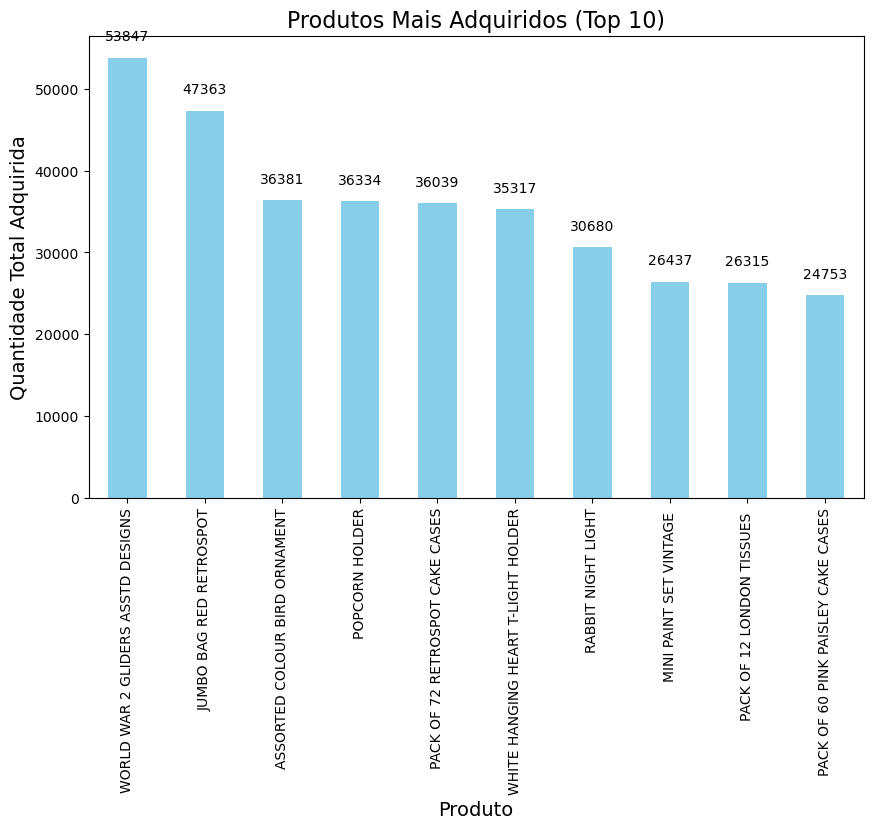

In [15]:
# Calculando a quantidade total adquirida para cada produto (agrupando por 'Description')
quantidade_por_produto = df.groupby('Description')['Quantity'].sum()

# Ordenando os produtos pelo total adquirido em ordem decrescente
top_10_produtos = quantidade_por_produto.sort_values(ascending=False).head(10)

# Criando um gráfico de barras para os produtos mais adquiridos (Top 10)
plt.figure(figsize=(10, 6))
top_10_produtos.plot(kind='bar', color='skyblue')

# Adicionando os valores das barras no gráfico
for p in range(len(top_10_produtos)):
    plt.annotate(str(top_10_produtos.iloc[p]), (p, top_10_produtos.iloc[p]),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.title('Produtos Mais Adquiridos (Top 10)', fontsize=16)
plt.xlabel('Produto', fontsize=14)
plt.ylabel('Quantidade Total Adquirida', fontsize=14)
plt.show()


Ao analisar os produtos mais vendidos na loja, observamos tendências interessantes que podem guiar estratégias de negócios. Destacam-se alguns itens populares, como os **"WORLD WAR 2 GLIDERS ASSTD DESIGNS"** e **"JUMBO BAG RED RETROSPOT"**, ambos com quantidades significativas vendidas. Esses produtos sugerem que há uma demanda por itens temáticos e retro, indicando que a nostalgia e o design são fatores atrativos para os clientes.

Outro ponto relevante é a preferência por produtos práticos e decorativos, como o **"PACK OF 72 RETROSPOT CAKE CASES"** e o **"WHITE HANGING HEART T-LIGHT HOLDER"**. Itens relacionados a confeitaria e decoração para casa têm boa aceitação, ressaltando a importância de oferecer variedade nesses segmentos.

Além disso, a presença de produtos temáticos, como o **"PACK OF 12 LONDON TISSUES"**, sugere que mercadorias relacionadas a temáticas específicas também podem ser bem recebidas. Essa diversificação pode ser explorada para atender a diferentes interesses dos clientes.

#### 5. Produtos Mais Adquiridos por Cliente

In [16]:
# Agrupando o DataFrame por 'StockCode' e 'CustomerID' e somando a quantidade para cada combinação
quantidade_por_cliente_produto = df.groupby(['StockCode', 'CustomerID'])['Quantity'].sum()

# Encontrando o cliente que comprou mais de cada produto
cliente_que_comprou_mais_por_produto = quantidade_por_cliente_produto.groupby('StockCode').idxmax()

# Extraindo os resultados em um DataFrame
resultados = pd.DataFrame({
    'Produto': cliente_que_comprou_mais_por_produto.index,
    '(ProdutoID, ClienteID)': cliente_que_comprou_mais_por_produto.values
})

# Adicionando os nomes dos produtos à tabela de resultados
resultados['Produto'] = resultados['Produto'].map(df.groupby('StockCode')['Description'].first())

print(resultados[['Produto', '(ProdutoID, ClienteID)']].head(30))


                                Produto (ProdutoID, ClienteID)
0           INFLATABLE POLITICAL GLOBE        (10002, 12731.0)
1              GROOVY CACTUS INFLATABLE       (10080, 17629.0)
2                          DOGGY RUBBER       (10120, 16931.0)
3               MINI FUNKY DESIGN TAPES       (10125, 12731.0)
4          COLOURING PENCILS BROWN TUBE       (10133, 17653.0)
5          COLOURING PENCILS BROWN TUBE       (10135, 12633.0)
6           ASSTD DESIGN RACING CAR PEN       (11001, 12931.0)
7                      FAN BLACK FRAME        (15030, 12864.0)
8           PAPER POCKET TRAVELING FAN        (15034, 13694.0)
9             ASSORTED COLOURS SILK FAN       (15036, 16684.0)
10                       SANDALWOOD FAN       (15039, 18094.0)
11  SMALL FOLDING SCISSOR(POINTED EDGE)       (16008, 12433.0)
12   FOLDING CAMPING SCISSOR W/KNIF & S       (16010, 12748.0)
13                      ANIMAL STICKERS       (16011, 17596.0)
14           FOOD/DRINK SPONGE STICKERS       (16012, 1

Com base nos resultados apresentados, podemos concluir que o cliente com o ID 12731 é um comprador frequente dos produtos **INFLATABLE POLITICAL GLOBE** e  **MINI FUNKY DESIGN TAPES**.  Esses dois produtos específicos são os mais adquiridos por esse cliente, indicando uma preferência significativa por esses itens.

Esses resultados fornecem informações sobre os produtos mais adquiridos por clientes específicos. Essa análise pode ser útil para estratégias de marketing direcionadas, recomendações personalizadas ou compreensão do comportamento do cliente em relação a determinados produtos.


#### 6. Análises de estatísticas

In [17]:
print("\nResumo estatístico:")
print(df.describe())



Resumo estatístico:
            Quantity      UnitPrice     CustomerID           Hour  \
count  541909.000000  541909.000000  406829.000000  541909.000000   
mean        9.552250       4.611114   15287.690570      13.078729   
std       218.081158      96.759853    1713.600303       2.443270   
min    -80995.000000  -11062.060000   12346.000000       6.000000   
25%         1.000000       1.250000   13953.000000      11.000000   
50%         3.000000       2.080000   15152.000000      13.000000   
75%        10.000000       4.130000   16791.000000      15.000000   
max     80995.000000   38970.000000   18287.000000      20.000000   

               Month  DaysSincePreviousPurchase  
count  541909.000000              402457.000000  
mean        7.553128                   1.433656  
std         3.509055                  12.198087  
min         1.000000                   0.000000  
25%         5.000000                   0.000000  
50%         8.000000                   0.000000  
75%    

1. **Quantity (Quantidade):**
   - A média de quantidade por transação é de aproximadamente 9.55 itens.
   - A quantidade média é positiva, o que indica que, em média, as transações envolvem uma compra de produtos.
   - Há uma variação significativa nos valores, conforme evidenciado pelo desvio padrão alto.

2. **UnitPrice (Preço Unitário):**
   - O preço unitário médio é de aproximadamente 4.61 libras esterlinas.
   - A variação nos preços unitários é elevada, indicada pelo desvio padrão considerável.
   - É importante observar que o preço unitário mínimo é negativo, o que pode indicar algum tipo de problema nos dados.

3. **CustomerID (Identificação do Cliente):**
   - Há 406,829 entradas com informações de identificação de cliente.
   - A média de CustomerID é aproximadamente 15,287.69, com um desvio padrão de 1,713.60.

4. **Hour (Hora):**
   - As transações ocorrem, em média, às 13:08 horas.
   - O horário mínimo de transação é 6:00 horas, e o máximo é 20:00 horas.

5. **DaysSincePreviousPurchase (Dias Decorridos Entre Compras):**
   - A média de dias decorridos entre a compra atual e a anterior é de aproximadamente 1.43 dias.
   - A maioria das transações parece ter um intervalo de dias próximo a zero, indicando compras frequentes.

Essas conclusões fornecem uma visão geral inicial do comportamento das transações, destacando algumas características-chave do conjunto de dados. 


### Análise das Informações 

In [18]:
print("Informações sobre o DataFrame:")
df.info()

missing_data = df.isnull().sum()

variable_types = df.dtypes

print("\nDados faltantes por variável:")
print(missing_data[missing_data > 0])

print("\nTipos das variáveis:")
print(variable_types)

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 61619 to 541540
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   InvoiceNo                  541909 non-null  object        
 1   StockCode                  541909 non-null  object        
 2   Description                540455 non-null  object        
 3   Quantity                   541909 non-null  int64         
 4   InvoiceDate                541909 non-null  datetime64[ns]
 5   UnitPrice                  541909 non-null  float64       
 6   CustomerID                 406829 non-null  float64       
 7   Country                    541909 non-null  object        
 8   Hour                       541909 non-null  int64         
 9   DayOfWeek                  541909 non-null  category      
 10  Month                      541909 non-null  int64         
 11  DaysSincePrevious

Apesar que na descrição do conjunto de dados consta que não há valores ausentes, é sempre adequado realizar uma análise. Note que, nesse conjunto há valores ausentes nas variáveis ``Description`` com 1454 e ``CustomerID`` com 135080. Apesar dessas variáveis serem importante para a análise de padrões de associação entre produtos, pois a ``Description`` fornece informações sobre os produtos que foram comprados juntos, bem como a variável  ``CustomerID`` também é importante, pois permite identificar padrões de compra por cliente.

Se optar por excluir as linhas com valores ausentes nas variáveis Description e CustomerID, você perderá 1454 + 135080 = 136534 linhas, o que representa aproximadamente 25\% do seu dataset.

Esta é uma perda significativa de dados, pois pode afetar a representatividade do seu dataset. Por exemplo, se os valores ausentes estiverem concentrados em determinados grupos de clientes, a exclusão dessas linhas pode levar a uma representação inadequada desses grupos.

No caso, será desenvolvido um sistema de recomendação que ignore as linhas com valores ausentes na variável ``CustomerID``, renomeada como ``Desconhecido``. A variável  ``Description`` será usada para identificação dos nome do produto associado ao código para melhor visualização, então ocorrerá a exclusão dos valores ``Nan`` porqeu são poucos, considerando que isso terá pouco impacto na performance do sistema. 

# --------------------------------------------------------------
# Pré-processamento de Dados
# --------------------------------------------------------------

### Tratamento de valores ausentes

In [19]:
# Removendo espaços extras na descrição
df['Description'] = df['Description'].str.strip()

In [20]:
# Eliminando as linhas sem nenhum número de fatura
df.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')


In [21]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [22]:
df.isnull().sum()

InvoiceNo                         0
StockCode                         0
Description                    1455
Quantity                          0
InvoiceDate                       0
UnitPrice                         0
CustomerID                   134697
Country                           0
Hour                              0
DayOfWeek                         0
Month                             0
DaysSincePreviousPurchase    138891
dtype: int64

In [23]:
df = df.dropna(subset=['Description'])

df['CustomerID'] = df['CustomerID'].fillna('Desconhecido')

In [24]:
# Excluindo as colunas 
colunas_para_excluir = ['Hour', 'DayOfWeek', 'Month', 'DaysSincePreviousPurchase']

df = df.drop(colunas_para_excluir, axis=1)

In [25]:
# Codificando os dados e os deixando adequados 
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1


In [26]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [27]:
# Agrupando por 'InvoiceNo', 'Country', 'Description' e aplicar a função hot_encode
basket_encoded = df.groupby(['InvoiceNo', 'Country', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index(['InvoiceNo', 'Country']).applymap(hot_encode)



# -------------------------------------------------------------
# Aplicação do Algoritmo Apriori
# -------------------------------------------------------------

### Justificativa:

O algoritmo Apriori é uma técnica poderosa de mineração de regras de associação, frequentemente utilizada para descobrir padrões em grandes conjuntos de dados transacionais. Seu foco principal é identificar relações entre diferentes itens frequentemente adquiridos ou associados em transações.

Para o presente conjunto de dados, que envolve transações de compras, a aplicação do Apriori é relevante para identificar associações entre produtos frequentemente adquiridos em conjunto. Esse conhecimento pode ser valioso para estratégias de marketing, otimização de layout de loja e até mesmo sugestões de produtos para os clientes.

###  Parâmetros e Configurações:

Ao aplicar o algoritmo Apriori, é essencial definir alguns parâmetros, incluindo o suporte mínimo (um limiar que controla a frequência mínima para um conjunto de itens a ser considerado) e a confiança mínima (um limiar para a confiança das regras geradas).No caso, estou interessada em descobrir padrões de associação entre produtos em transações de clientes, a associação entre o número da fatura e o código do produto pode ser apropriada.

**`min_support` (Suporte Mínimo):**

    O suporte mínimo representa a porcentagem mínima de transações que deve conter um conjunto específico de itens. Valores mais altos de suporte resultam em regras mais restritas, enquanto valores mais baixos permitem regras mais gerais. Neste projeto, o vaor desse parâmtro é 0.02, o que  significa que um conjunto de itens deve aparecer em pelo menos 2% das transações para ser considerado, deixando as transações um pouco mais restritas.
    
 **`min_confidence` (Confiança Mínima):** 
 
     A confiança mínima é a porcentagem mínima de vezes que a regra deve ser verdadeira. Valores mais altos de confiança geram regras mais confiáveis, mas podem resultar em menos regras sendo geradas. É a probabilidade condicional de que a compra do item "A" também incluirá o item "B". Em outras palavras, a confiança é a porcentagem de transações que contêm "A" e também contêm "B". Neste projeto, seu valor é 0.7, o que significa que a regra deve ser verdadeira em pelo menos 70% das vezes.

**`min_lift` (Lift Mínimo):**

    O lift é uma medida de quão mais provável é que a regra seja verdadeira em comparação com se os itens fossem independentes. Um lift de 1 indica independência, enquanto um lift maior que 1 sugere uma associação positiva. Aqui, seu valor é de 1.2, o que significa que estou interessada em regras com um lift de pelo menos 1.2.


Antes de analisar os resultados, se faz necessária uma explicação sobre o que cada coluna no dataframe gerado após a aplicação do algoritmo Apriori representa. Cada uma fornece informações específicas sobre as regras de associação descobertas. Aqui está uma explicação para cada uma das colunas.

1. **antecedents:**
   - Os itens ou conjunto de itens que aparecem no lado esquerdo da regra (antecedente). Representa as condições prévias que implicam a ocorrência do consequente. São os itens que o consumidor compra antes de considerar os outros. 
   

2. **consequents:**
   - Os itens ou conjunto de itens que aparecem no lado direito da regra (consequente). Representa o resultado ou a ação que é prevista ou depende das condições do antecedente. São os itens que vêm depois, como a próxima compra que se faz depois das primeiras escolhas.
   

3. **antecedent support:**
   - A proporção de transações no conjunto de itens que contêm o antecedente. Indica a frequência relativa do antecedente, mostrando o quão popular são as primeiras escolhas em comparação com todas as compras.
   

4. **consequent support:**
   - A proporção de transações no conjunto de itens que contêm o consequente. Indica a frequência relativa do consequente, apresentando o quão comuns são os produtos que são adquiridos na segunda rodada de compras.


5. **support:**
   - A proporção de transações no conjunto de itens que contêm tanto o antecedente quanto o consequente. Indica a frequência relativa da combinação do antecedente e do consequente. Diz o quão frequentemente o consumidor compra os dois conjuntos de produtos juntos.
   

6. **confidence:**
   - A medida de confiabilidade da regra. Indica a probabilidade condicional de o consequente ocorrer, dado que o antecedente ocorreu. Calculado como `support(antecedent & consequent) / support(antecedent)`. É a probabilidade do consumidor adquirir o segundo conjunto de itens, sabendo que já pegou o primeiro.
   

7. **lift:**
   - O aumento na probabilidade de ocorrência do consequente, dado o antecedente, em comparação com a probabilidade de ocorrência do consequente em geral. Calculado como `lift = support(antecedent & consequent) / (support(antecedent) * support(consequent))`. Indicando o quanto mais provável é pegar o segundo item quando comparado ao caso em que não há conexão entre os dois produtos.
   

8. **leverage:**
   - Mede quanto a ocorrência do antecedente e do consequente juntos difere do que seria esperado se fossem independentes. Calculado como `leverage = support(antecedent & consequent) - (support(antecedent) * support(consequent))`. Apresentando como a escolha de adquirir ambos os itens é diferente do que seria se eles fossem escolhidos de forma independente.


9. **conviction:**
   - Avalia o quanto a regra é dependente do antecedente. Quanto maior o valor, mais dependente é a regra do antecedente. Calculado como `conviction = (1 - support(consequent)) / (1 - confidence)`. Avaliando o quão forte é a relação entre os dois itens, considerando o quanto o segundo item depende do primeiro. 
   


### Associação de produtos de todos os países

Será realizada a associação de todos os produtos que estão presentes no conjunto de dados.

In [31]:
# Construindo o modelo
frq_items = apriori(basket_encoded, min_support = 0.02, use_colnames = True)
 
# Regras do df
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
150,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029065,0.049250,0.026299,0.904841,18.372292,0.024868,9.991211
148,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030715,0.051725,0.026299,0.856240,16.553708,0.024710,6.596243
23,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037168,0.049250,0.030715,0.826371,16.778990,0.028884,5.475746
156,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.024989,0.101509,0.020040,0.801942,7.900200,0.017503,4.536498
136,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037168,0.051725,0.029065,0.781984,15.118119,0.027142,4.349573


### Análise dos resultados

Interpretando os resultados apresentados para todo o conjunto de dados:


1. **Regra 1:**
   - **Antecedentes:** Pessoas que compraram "ROSES REGENCY TEACUP AND SAUCER" e "PINK REGENCY...".
   - **Consequentes:** Muitas dessas pessoas também compraram "GREEN REGENCY TEACUP AND SAUCER".
   - **Confiança (confidence):** 90% das pessoas que pegaram os primeiros itens também levaram o "GREEN REGENCY TEACUP AND SAUCER".
   - **Lift:** A chance de comprar o "GREEN REGENCY TEACUP AND SAUCER" aumenta 18 vezes se você já pegou os primeiros itens.
   - **Interpretação:** Esses itens estão muito relacionados, e se alguém comprou os primeiros, é quase certo que também vai pegar o "GREEN REGENCY TEACUP AND SAUCER".


2. **Regra 2:**
   - **Antecedentes:** Pessoas que compraram "GREEN REGENCY TEACUP AND SAUCER" e "PINK REGENCY...".
   - **Consequentes:** Muitas dessas pessoas também compraram "ROSES REGENCY TEACUP AND SAUCER".
   - **Confiança:** 86% das pessoas que pegaram os primeiros itens também levaram o "ROSES REGENCY TEACUP AND SAUCER".
   - **Lift:** A chance de comprar o "ROSES REGENCY TEACUP AND SAUCER" aumenta 16 vezes se você já pegou os primeiros itens.
   - **Interpretação:** Novamente, esses itens são fortemente associados, sugerindo que os clientes têm uma tendência forte de pegar ambos.


3. **Regra 3:**
   - **Antecedentes:** Pessoas que compraram "PINK REGENCY TEACUP AND SAUCER".
   - **Consequentes:** Muitas dessas pessoas também compraram "GREEN REGENCY TEACUP AND SAUCER".
   - **Confiança:** 83% das pessoas que pegaram o "PINK REGENCY TEACUP AND SAUCER" também levaram o "GREEN REGENCY TEACUP AND SAUCER".
   - **Lift:** A chance de comprar o "GREEN REGENCY TEACUP AND SAUCER" aumenta 16 vezes se você já pegou o "PINK REGENCY TEACUP AND SAUCER".
   - **Interpretação:** Mais uma vez, uma forte associação indicando que esses dois produtos são frequentemente comprados juntos.


4. **Regra 4:**
   - **Antecedentes:** Pessoas que compraram "JUMBO BAG PINK POLKADOT" e "JUMBO STORAGE BAG SUKI".
   - **Consequentes:** Muitas dessas pessoas também compraram "JUMBO BAG RED RETROSPOT".
   - **Confiança:** 80% das pessoas que pegaram os primeiros itens também levaram o "JUMBO BAG RED RETROSPOT".
   - **Lift:** A chance de comprar o "JUMBO BAG RED RETROSPOT" aumenta quase 8 vezes se você já pegou os primeiros itens.
   - **Interpretação:** Esses tipos de sacolas grandes estão relacionados, e se você escolhe um estilo, é provável que também escolha outro.


5. **Regra 5:**
   - **Antecedentes:** Pessoas que compraram "PINK REGENCY TEACUP AND SAUCER".
   - **Consequentes:** Muitas dessas pessoas também compraram "ROSES REGENCY TEACUP AND SAUCER".
   - **Confiança:** 78% das pessoas que pegaram o "PINK REGENCY TEACUP AND SAUCER" também levaram o "ROSES REGENCY TEACUP AND SAUCER".
   - **Lift:** A chance de comprar o "ROSES REGENCY TEACUP AND SAUCER" aumenta mais de 15 vezes se você já pegou o "PINK REGENCY TEACUP AND SAUCER".
   - **Interpretação:** Novamente, uma forte associação entre esses produtos de chá.


Essas regras de associação sugerem padrões de compra comuns entre os produtos mencionados, o que pode ser útil para estratégias de marketing, como agrupar produtos próximos nas lojas online ou sugerir produtos relacionados aos clientes durante o processo de compra.


## Associação de produtos do Reino Unido e da França

Agora, será realizada uma análise verificando a associação dos produtos do Reino Unido e depois da França, para verificar o comportamento de compra de cada país. Isso justifica-se porque na análise exploratória foi identificado que os  produtos mais comprados pelos países e clientes são diversificados, então realizar a análise indiviadualmente pode fornecer informações mais detalhadas dos compradores. Com isso, espera-se fazer uma associação mais eficaz entre os produtos mais consumidos de alguns países que fornecem maior rendabilidade a loja.  

In [32]:
# Transações feitas na França
basket_France = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
 
# Transações feitas no Reuno Unido
basket_UK = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
 


In [33]:
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded
 
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded 


##  Construindo os modelos

### Reino Unido

In [34]:
frq_items = apriori(basket_UK, min_support = 0.02, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
166,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029249,0.050035,0.026410,0.902930,18.046041,0.024947,9.786434
164,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030910,0.051267,0.026410,0.854419,16.666089,0.024826,6.516893
27,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037660,0.050035,0.030910,0.820768,16.403939,0.029026,5.300203
172,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.027053,0.103820,0.021696,0.801980,7.724749,0.018887,4.525711
146,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037660,0.051267,0.029249,0.776671,15.149556,0.027319,4.248149


### Análise dos resultados (Reino Unido)

1. **Regra 1 (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY... -> GREEN REGENCY TEACUP AND SAUCER):**
   - **Interpretação:** Quando os produtos ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY... ocorrem juntos, é altamente provável (confiança de 90%) que o produto GREEN REGENCY TEACUP AND SAUCER também esteja presente. O lift de 18.05 sugere uma forte associação entre esses itens, bem acima do que seria esperado ao acaso.
   - **Implicações de Negócios:** Pode ser estratégico agrupar ou promover esses conjuntos de produtos como um pacote, já que a presença de um implica fortemente na presença do outro.
   
   

2. **Regra 2 (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY... -> ROSES REGENCY TEACUP AND SAUCER):**
   - **Interpretação:** Similar à regra 1, mas nesta regra, a ordem dos produtos é invertida. A confiança é um pouco menor (85%), mas ainda é alta, indicando uma associação forte entre os produtos.
   - **Implicações de Negócios:** A inversão dos produtos na regra sugere que os clientes que compram GREEN REGENCY TEACUP AND SAUCER e PINK REGENCY... também são propensos a comprar ROSES REGENCY TEACUP AND SAUCER. Pode ser interessante explorar estratégias de promoção ou sugestões de produtos relacionados.
   
   

3. **Regra 3 (PINK REGENCY TEACUP AND SAUCER -> GREEN REGENCY TEACUP AND SAUCER):**
   - **Interpretação:** Quando o produto PINK REGENCY TEACUP AND SAUCER é comprado, há uma probabilidade significativamente alta (confiança de 82%) de que o produto GREEN REGENCY TEACUP AND SAUCER também seja comprado. O lift de 16.40 destaca uma associação forte.
   - **Implicações de Negócios:** Estratégias de marketing, como bundles ou promoções, que destacam a combinação desses produtos podem ser eficazes.
   
   

4. **Regra 4 (JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI -> JUMBO BAG RED RETROSPOT):**
   - **Interpretação:** Quando os produtos JUMBO BAG PINK POLKADOT e JUMBO STORAGE BAG SUKI são comprados juntos, há uma probabilidade significativamente alta (confiança de 80%) de que o produto JUMBO BAG RED RETROSPOT também seja comprado. O lift de 7.72 sugere uma associação forte.
   - **Implicações de Negócios:** Pode ser útil criar pacotes ou ofertas especiais que incluam esses produtos, já que a combinação é popular entre os clientes.
   
   

5. **Regra 5 (PINK REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER):**
   - **Interpretação:** Quando o produto PINK REGENCY TEACUP AND SAUCER é comprado, há uma probabilidade significativamente alta (confiança de 78%) de que o produto ROSES REGENCY TEACUP AND SAUCER também seja comprado. O lift de 15.15 destaca uma associação forte.
   - **Implicações de Negócios:** Estratégias de cross-selling, como sugerir ROSES REGENCY TEACUP AND SAUCER aos clientes que compraram PINK REGENCY TEACUP AND SAUCER, podem ser eficazes.


### França

In [35]:
frq_items = apriori(basket_France, min_support = 0.02, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7685,"(ALARM CLOCK BAKELIKE GREEN, SET/6 RED SPOTTY ...","(ALARM CLOCK BAKELIKE PINK, SET/6 RED SPOTTY P...",0.020408,0.025510,0.020408,1.0,39.200000,0.019888,inf
12297,"(DOLLY GIRL CHILDRENS CUP, POSTAGE, SPACEBOY C...","(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS ...",0.025510,0.028061,0.025510,1.0,35.636364,0.024794,inf
8733,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS ...","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...",0.028061,0.033163,0.028061,1.0,30.153846,0.027131,inf
8759,"(DOLLY GIRL CHILDRENS CUP, POSTAGE, SPACEBOY C...",(SPACEBOY CHILDRENS CUP),0.025510,0.033163,0.025510,1.0,30.153846,0.024664,inf
12291,"(DOLLY GIRL CHILDRENS CUP, POSTAGE, DOLLY GIRL...",(SPACEBOY CHILDRENS CUP),0.025510,0.033163,0.025510,1.0,30.153846,0.024664,inf


### Análise dos resultados (França)


1. **Regra 1 (ALARM CLOCK BAKELIKE GREEN, SET/6 RED SPOTTY ... -> ALARM CLOCK BAKELIKE PINK, SET/6 RED SPOTTY P...):**
   - **Interpretação:** Quando os produtos ALARM CLOCK BAKELIKE GREEN e SET/6 RED SPOTTY ... ocorrem juntos, é praticamente garantido (confiança de 100%) que os produtos ALARM CLOCK BAKELIKE PINK e SET/6 RED SPOTTY ... também estão presentes e são comprados. O lift de 39.20 sugere uma associação extremamente forte.
   - **Implicações de Negócios:** Esses produtos são altamente associados e, portanto, podem ser promovidos ou vendidos em conjunto. Ofertas especiais ou bundles podem ser estratégicos para incentivar a compra de ambos os conjuntos.
   
   

2. **Regra 2 (POSTAGE, DOLLY GIRL CHILDRENS CUP, SPACEBOY C... -> DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...):**
   - **Interpretação:** Quando os produtos POSTAGE, DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP ocorrem juntos, é praticamente garantido (confiança de 100%) que os produtos DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS BOWL também estão presentes e são comprados. O lift de 35.64 sugere uma associação extremamente forte.
   - **Implicações de Negócios:** Estratégias de marketing que destacam essas associações podem ser implementadas. Bundles ou pacotes de produtos relacionados podem ser promovidos para incentivar compras combinadas.
   
   

3. **Regra 3 (DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS... -> DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...):**
   - **Interpretação:** Quando os produtos DOLLY GIRL CHILDRENS BOWL e SPACEBOY CHILDRENS BOWL ocorrem juntos, é praticamente garantido (confiança de 100%) que os produtos DOLLY GIRL CHILDRENS CUP e SPACEBOY CHILDRENS CUP também estão presentes e são comprados. O lift de 30.15 sugere uma associação extremamente forte.
   - **Implicações de Negócios:** Estratégias semelhantes às da regra 2 podem ser aplicadas, promovendo pacotes ou bundles desses produtos infantis.
   
   

4. **Regra 4 (POSTAGE, DOLLY GIRL CHILDRENS CUP, SPACEBOY C... -> SPACEBOY CHILDRENS CUP):**
   - **Interpretação:** Quando os produtos POSTAGE, DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP ocorrem juntos, é praticamente garantido (confiança de 100%) que o produto SPACEBOY CHILDRENS CUP também está presente e é comprado. O lift de 30.15 sugere uma associação extremamente forte.
   - **Implicações de Negócios:** Essa regra destaca a forte associação entre os produtos infantis e o SPACEBOY CHILDRENS CUP. Estratégias de upsell ou recomendação podem ser aplicadas para incentivar a compra adicional.
   
   

5. **Regra 5 (POSTAGE, DOLLY GIRL CHILDRENS BOWL, DOLLY GIR... -> SPACEBOY CHILDRENS CUP):**
   - **Interpretação:** Quando os produtos POSTAGE, DOLLY GIRL CHILDRENS BOWL, DOLLY GIRL CHILDRENS CUP ocorrem juntos, é praticamente garantido (confiança de 100%) que o produto SPACEBOY CHILDRENS CUP também está presente e é comprado. O lift de 30.15 sugere uma associação extremamente forte.
   - **Implicações de Negócios:** Similar à regra 4, essa associação destaca oportunidades de estratégias de upsell ou recomendação para o SPACEBOY CHILDRENS CUP quando esses produtos específicos são comprados em conjunto.
   
   

**Obervação:** O valor ``inf`` para a conviction sugere que a confiança é máxima, indicando uma associação forte. No entanto, é importante ter em mente que valores extremos podem ser devido a conjuntos de dados específicos e podem não ser generalizáveis em todas as situações.


# ------------------------------------------------------------------
# Conclusão Geral
# ------------------------------------------------------------------

A análise de associações de produtos oferece insights valiosos para a personalização de estratégias de marketing, melhorando a experiência do consumidor e impulsionando o sucesso no mercado. Adaptar-se às nuances culturais e às preferências específicas de cada região é essencial para construir relacionamentos duradouros com os clientes.

# ----------------------------------------------------------------------
# Possíveis estratégias para aumento de vendas
# ----------------------------------------------------------------------

Com base nas conclusões obtidas a partir das regras de associação, pode-se desenvolver várias estratégias para aumentar as vendas. Embora sem conhecimento adicional sobre o negócio, são sugeridas algumas formas de rentabilizar o conhecimento gerado por este projeto. Aqui estão algumas sugestões:

1. **Pacotes e Promoções:**
   - Criar pacotes de produtos que são frequentemente comprados juntos e ofereça promoções especiais para incentivar os clientes a adquirirem o conjunto.
   

2. **Vendas Cruzadas:**
   - Implementar estratégias de vendas cruzadas, onde produtos associados são exibidos juntos nas páginas de produtos ou no processo de checkout online.


3. **Recomendações Personalizadas:**
   - Utilizar as regras de associação para personalizar as recomendações de produtos para cada cliente, sugerindo itens frequentemente comprados por outros clientes que também adquiriram produtos semelhantes.


4. **Campanhas de Marketing Direcionadas:**
   - Direcionar campanhas de marketing específicas para produtos associados. Isso pode incluir e-mails promocionais, publicidade online direcionada e promoções.
   
   
5. **Programas de Fidelidade:**
   - Integrar produtos associados em programas de fidelidade, oferecendo recompensas ou descontos especiais quando os clientes compram esses produtos em conjunto.


6. **Ofertas Exclusivas para Clientes Leais:**
   - Oferecer ofertas exclusivas para clientes que compram regularmente produtos associados, incentivando a fidelidade à marca.


7. **Análise de Temporadas e Eventos Especiais:**
   - Considerar ajustar suas estratégias com base em temporadas ou eventos especiais. Por exemplo, crie promoções sazonais que incluam produtos associados popularmente durante determinadas épocas do ano. Na análise exploratória verificou um volume de vendas maior em novembro. 


8. **Análise Contínua:**
    - Manter uma análise contínua das regras de associação à medida que o comportamento do cliente e as tendências de compra evoluem ao longo do tempo.


**Obervação:** essas estratégias deve ser feita de forma ética e respeitando a privacidade e preferências dos clientes. 

# ----------------------------------------------------------------------
# Referências
# ----------------------------------------------------------------------

**Dataset**
1. Online Retail. (2015). UCI Machine Learning Repository. Disponível em: https://doi.org/10.24432/C5BW33.

**Livros**

1. Faceli, K., Lorena, A. C., Gama, J., & Carvalho, A. C. P. de L. F. (2011). Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina. Grupo Gen - LTC. 



2. Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020. ISBN: 978-1108473989.  Disponível em: https://dataminingbook.info/


3. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Springer. Disponível em: https://www.statlearning.com/.
